## Lab Two: Style Transfer

##### Name: Ishna Satyarth
##### SMU id: 48305716

#### Question 1:
Manipulate the above decoder code to fix any errors in the upsampling layers. You should use strided convolutions without any pooling steps (i.e., do NOT use unpooling). You can also use another network besides VGG if you desire (such as UNET, for example).

Downsampling and upsampling are two fundamental and widely used image operations, with applications in image display, compression, and progressive transmission. Downsampling is the reduction in spatial resolution while keeping the same two-dimensional (2D) representation. It is typically used to reduce the storage and/or transmission requirements of images.
Upsampling is the increasing of the spatial resolution while keeping the 2D representation of an image. It is typically used for zooming in on a small region of an image, and for eliminating the pixelation effect that arises when a low-resolution image is displayed on a relatively large frame. More recently, downsampling and upsampling have been used in combination: in lossy compression, multiresolution lossless compression, and progressive transmission.
(https://www2.seas.gwu.edu/~ayoussef/papers/ImageDownUpSampling-CISST99.pdf).

In the given code for decoder: 

1. Since we are doing upsampling, the next convolution layer will be doubled.
2. Also, contrary to what was discussed in class, the order of decoder seems correct as while decoding, we are moving from last layer up to the first layer tp get the final output.

In this work, in question 1 and 2, we have trained an autoencoder on different target layer of the CNN. We have used VGG19 as our encoder and its weights are fixed. A sample code available in the canvas is used as the decoder. Since It was indicated in question 1 to modify decoder design, we have modified the code as follow:

In [ ]:
""""
from keras.layers import Input, Conv2D, UpSampling2D,Conv2DTranspose

def decoder_layers(inputs, layer):
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='decoder_block5_conv1')(inputs)
    if layer == 1:
        return x
# Here, we have used Conv2DTranspose instead with strides of (2,2) instead of Upsampling, the kernel sizes are
# set to (4,4) in order as It was instructed in class.
    x = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', name='decoder_block4_conv4')(x)
    x = Conv2D(512, (2, 2), activation='relu', padding='same', name='decoder_block4_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='decoder_block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='decoder_block4_conv1')(x)
    if layer == 2:
        return x
    
    x = Conv2DTranspose(256, (4,4), strides=(2,2), padding='same', name='decoder_block3_conv4')(x)
    x = Conv2D(256, (2, 2), activation='relu', padding='same', name='decoder_block3_conv3')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='decoder_block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='decoder_block3_conv1')(x)
    if layer == 3:
        return x
    
    x = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', name='decoder_block2_conv4')(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same', name='decoder_block2_conv1')(x)
    if layer == 4:
        return x
    
    x = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', name='decoder_block1_conv4')(x)
    x = Conv2D(64, (2, 2), activation='relu', padding='same', name='decoder_block1_conv1')(x)
    if layer == 5:
        return x
""""    

Implemtation of the autoencoder has been done on two different layer of the network. I have taken one early layers 1 and one later layer as layer 3. I am using the Cats and Dogs dataset as the training dataset. Around 25000 cat images were considered as the training data and remainder 145 images are used as testing data. I have performed 2 epoch in the simulations. The simulations are carried out on 'gpgpu-1' partition of HPC servers each using 250Gb of Ram, 16 CPU core per node and 2 GPU per node. Layer 1 and layer 3 took around 30 hours for training and obtained the result.

During the training procedure, I have used sample number 'cat.10008' in the callback function which is repeated in every 100 steps. This sample is shown below:

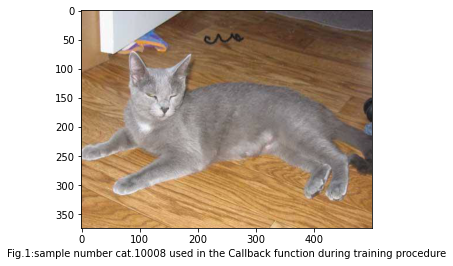

In [4]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dataset_dogs_vs_cats/test/cats/'
# plot first few images
i = 10008
filename = folder + 'cat.' + str(i) + '.jpg'
# load image pixels
image = imread(filename)
# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.xlabel('Fig.1:sample number cat.10008 used in the Callback function during training procedure')
pyplot.show()

The reconstructed picture of this input from layer 1 and 3 layer of the autoencoder is depicted below.

When layer 3 of the autoencoder is chosen as the target layer, we are dealing with around 15 million trainable parameters. Based on the result shown in the Fig.3, It can be seen that the autoencoder is learning the feature of the picture and quality of the reconstructed picture will improve as training goes further. Due to high compution time of the procedure, the simulation is stoped in 30h and only 7000 steps were captured.


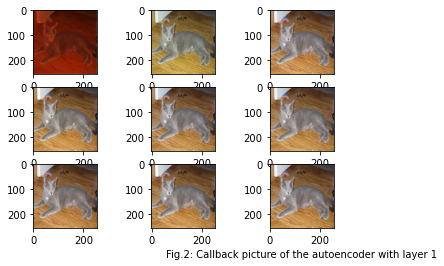

In [5]:
## Autoencoder output from layer 1,
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dataset_dogs_vs_cats/output1/'
#plot image
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder + str(1000*i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.xlabel('Fig.2: Callback picture of the autoencoder with layer 1')
pyplot.show()

In Fig.2, the output of autoencoder when layer 1 is the target layer is shown. In this case, learning is much faster in term of training hour approx 5 hours and the reconstructed images are shown in the Fig.2. In layer 1, there are 300K trainable parameters in the autoencoder.

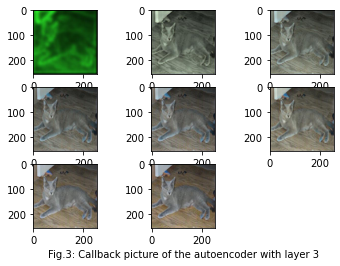

In [8]:
## Autoencoder output from layer 3,
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dataset_dogs_vs_cats/output3/'
# plot first few images
for i in range(8):
    pyplot.subplot(330 + 1 + i)
    filename = folder + str(1000*i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
pyplot.xlabel('Fig.3: Callback picture of the autoencoder with layer 3')
# show the figure
pyplot.show()

In Fig. 4,the loss function vs the epochs in the training procedure of the autoencoder when layer 1 is chosen as target layer is depicted. The same is for the testing data

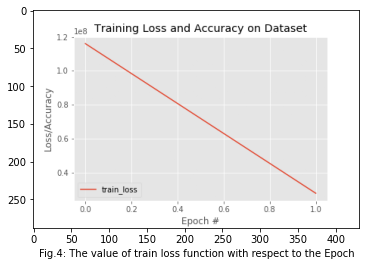

In [10]:
folder = './'
# plot first few images

filename = folder + 'Level_1.png'
# load image pixels
image = imread(filename)
# plot raw pixel data
pyplot.imshow(image)
pyplot.xlabel('Fig.4: The value of train loss function with respect to the Epoch')
# show the figure
pyplot.show()        

***Evaluation of the decoder ***

Fig.5 shows testing images before passing through the autoencoder. Random samples from the test dataset has been chosen and the recounstucted image of the autoencoder with target layers 1 and 3 are depicted in Fig.6 and Fig.7.  In Fig.6, the reconstructed image of the autoencoder when layer 1 is the target layer is shown. As it can be seen in these figures, the reconstructed images are the same as those given to the autoencoder. Fig.7 shows the reconstructed testing images when target layer is layer 3. In this case, the reconstructed images should be better than two other cases, but training was stoped after 32h. Other than color difference when third layer is our target, the texture and content of the testing images is fully covered which indicates that training was succeful but training will be much slower than among other cases.

##### We used VGG to calculate the loss.


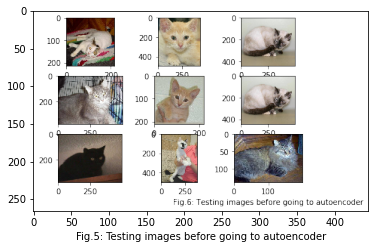

In [12]:
folder = './'
# plot first few images

filename = folder + 'download_1.png'
# load image pixels
image = imread(filename)
# plot raw pixel data
pyplot.imshow(image)
pyplot.xlabel('Fig.5: Testing images before going to autoencoder')
# show the figure
pyplot.show() 

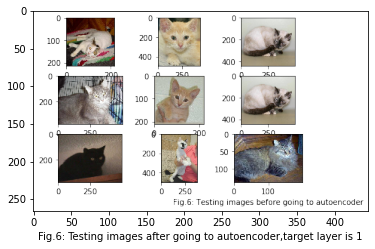

In [13]:
folder = './'
# plot first few images

filename = folder + 'download_1.png'
# load image pixels
image = imread(filename)
# plot raw pixel data
pyplot.imshow(image)
pyplot.xlabel('Fig.6: Testing images after going to autoencoder,target layer is 1')
# show the figure
pyplot.show() 

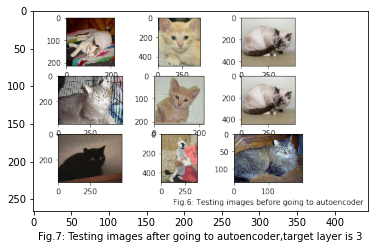

In [14]:
folder = './'
# plot first few images

filename = folder + 'download_1.png'
# load image pixels
image = imread(filename)
# plot raw pixel data
pyplot.imshow(image)
pyplot.xlabel('Fig.7: Testing images after going to autoencoder,target layer is 3')
# show the figure
pyplot.show() 

The style is created by passing the image through encoder decoder model. However, once passed through encoder, the output is filtered for whitning and then colored. Then the output is pass through the decoder.

#### Whitening Transform
The whitening transform removes the style from the content image, keeping the global content structure.

The features of the content image, $f_c$, are transformed to obtain $\hat{f}_c$, such that the feature maps are uncorrelated ($\hat{f}_c \hat{f}_c^T = I$),

$$
    \hat{f}_c = E_c D_c^{- \frac{1}{2}} E_c^T f_c
$$
where $D_c$ is a diagonal matrix with the eigenvalues of the covariance matrix $f_c f_c^T \in R^{C \times C}$, and $E_c$ is the corresponding orthogonal matrix of eigenvectors, satisfying $f_c f_c^T = E_c D_c E_c^T$.

(Yijun Li et al., Universal Style Transfer)

#### Coloring Transform
The coloring transform adds the style from the style image onto the content image.

The whitening transformed features of the content image, $\hat{f}_c$, are transformed to obtain $\hat{f}_{cs}$, such that the feature maps have that desired correlations ($\hat{f}_{cs} \hat{f}_{cs}^T = f_s f_s^T$),

$$
    \hat{f}_{cs} = E_s D_s^{\frac{1}{2}} E_s^T \hat{f}_c
$$
where $D_s$ is a diagonal matrix with the eigenvalues of the covariance matrix $f_s f_s^T \in R^{C \times C}$, and $E_s$ is the corresponding orthogonal matrix of eigenvectors, satisfying $f_c f_c^T = E_c D_c E_c^T$.

In practice, we also take a weighted sum of the colored and original activations such that:

$$ f_{blend} = \alpha\hat{f}_{cs} + (1-\alpha)\hat{f}_c $$
Before each transform step, the mean of the corresponding feature maps are subtracted, and the mean of the style features are added back to the final transformed features.

In [5]:
import sys
from keras.models import load_model
from keras.preprocessing import image
from keras import backend as K
import numpy as np
from scipy.misc import imsave
from vgg import VGG19, preprocess_input

def get_vgg_features(vgg, inputs, target_layer):
    output_layers = [
            'block1_conv1',
            'block2_conv1',
            'block3_conv1',
            'block4_conv1',
            'block5_conv1'
    ]

    outputs = [layer.output for layer in vgg.layers
               if layer.name == output_layers[target_layer-1]]
    f = K.function([vgg.input] + [K.learning_phase()], outputs)
    return f([inputs, 1.])


def wct(content, style, alpha=1.0, eps=1e-5):
    '''
    https://github.com/eridgd/WCT-TF/blob/master/ops.py
       Perform Whiten-Color Transform on feature maps using numpy
       See p.4 of the Universal Style Transfer paper for equations:
       https://arxiv.org/pdf/1705.08086.pdf
    '''
    # 1xHxWxC -> CxHxW
    content_t = np.transpose(np.squeeze(content), (2, 0, 1))
    style_t = np.transpose(np.squeeze(style), (2, 0, 1))

    # CxHxW -> CxH*W
    content_flat = content_t.reshape(-1, content_t.shape[1]*content_t.shape[2])
    style_flat = style_t.reshape(-1, style_t.shape[1]*style_t.shape[2])

    # Whitening transform
    mc = content_flat.mean(axis=1, keepdims=True)
    fc = content_flat - mc
    fcfc = np.dot(fc, fc.T) / (content_t.shape[1]*content_t.shape[2] - 1)
    Ec, wc, _ = np.linalg.svd(fcfc)
    k_c = (wc > 1e-5).sum()
    Dc = np.diag((wc[:k_c]+eps)**-0.5)
    fc_hat = Ec[:,:k_c].dot(Dc).dot(Ec[:,:k_c].T).dot(fc)

    # Coloring transform
    ms = style_flat.mean(axis=1, keepdims=True)
    fs = style_flat - ms
    fsfs = np.dot(fs, fs.T) / (style_t.shape[1]*style_t.shape[2] - 1)
    Es, ws, _ = np.linalg.svd(fsfs)
    k_s = (ws > 1e-5).sum()
    Ds = np.sqrt(np.diag(ws[:k_s]+eps))
    fcs_hat = Es[:,:k_s].dot(Ds).dot(Es[:,:k_s].T).dot(fc_hat)
    fcs_hat = fcs_hat + ms

    # Blend transform features with original features
    blended = alpha*fcs_hat + (1 - alpha)*(fc)

    # CxH*W -> CxHxW
    blended = blended.reshape(content_t.shape)
    # CxHxW -> 1xHxWxC
    blended = np.expand_dims(np.transpose(blended, (1,2,0)), 0)

    return np.float32(blended)

Loading decoders...
Loading VGG...
Style Image


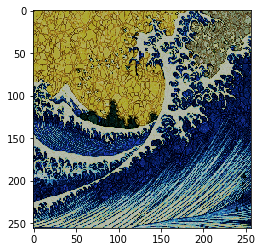

Content Image


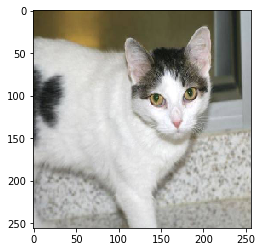

Styling...


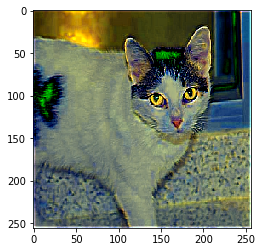

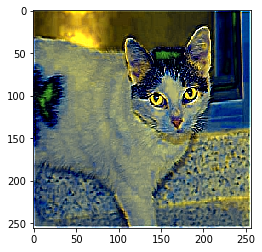

Saving output...


/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:65: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [6]:
###
INPUT_Content_PATH ='./dataset_dogs_vs_cats/test/cats/'+ 'cat.' + str(11315) + '.jpg'
img_c = image.load_img(INPUT_Content_PATH,target_size=(256, 256))
img_c = image.img_to_array(img_c)
img_c_shape = img_c.shape
img_c = np.expand_dims(img_c, axis=0)

###
INPUT_Style_PATH = './Style_2.png'
img_s = image.load_img(INPUT_Style_PATH,target_size=(256, 256))
img_s = image.img_to_array(img_s)
img_s_shape = img_s.shape
img_s = np.expand_dims(img_s, axis=0)
###
INPUT_Style_PATH_1 = './Style_1.png'
img_s_1 = image.load_img(INPUT_Style_PATH_1,target_size=(256, 256))
img_s_1 = image.img_to_array(img_s_1)
img_s_shape_1 = img_s_1.shape
img_s_1 = np.expand_dims(img_s_1, axis=0)
#
INPUT_Style_PATH_2 = './Style_2.png'
img_s_2 = image.load_img(INPUT_Style_PATH_2,target_size=(256, 256))
img_s_2 = image.img_to_array(img_s_2)
img_s_shape_2 = img_s_2.shape
img_s_2 = np.expand_dims(img_s_2, axis=0)
#
assert img_c_shape == img_s_shape, \
    'Content and style image should be the same shape, %s != %s' \
    % (str(img_c_shape), str(img_s_shape))

input_shape = img_c_shape

print('Loading decoders...')
decoders = {}
decoders[1] = load_model('./decoder_1.h5')
decoders[2] = load_model('./decoder_1.h5')
decoders[3] = load_model('./decoder_3.h5')
decoders[4] = load_model('./decoder_3.h5')
decoders[5] = load_model('./decoder_3.h5')

print('Loading VGG...')
vgg = VGG19(input_shape=input_shape, target_layer=3)

import matplotlib.pyplot as plt

print('Style Image')
plt.imshow(np.clip(img_s[0] / 255, 0, 1))
plt.show()
print('Content Image')
plt.imshow(np.clip(img_c[0] / 255, 0, 1))
plt.show()

print('Styling...')
for i in [1, 1]:
    feats_c = get_vgg_features(vgg, img_c, i)
    feats_s = get_vgg_features(vgg, img_s, i)
    feats_cs = wct(feats_c, feats_s,alpha=1.0)
    img_c = decoders[i].predict(feats_cs)
    plt.imshow(np.clip(img_c[0] / 255, 0, 1))
    plt.show()

print('Saving output...')
output_img = img_c[0]
OUTPUT_IMG_WCT_PATH = './cat_'+str(11315)+'_'+str(target_layer)+'Style2'+'_WCT_Style.jpg'
imsave(OUTPUT_IMG_WCT_PATH , output_img)

The result of the WCT procedure is depicted in Fig.8. Style and Content image are shown in the above cell. As it can be seen here, performance of the WCT algorithm is acceptable on Layer 3. The Third layer output is not well tuned since this layer needs more training.

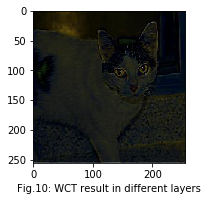

In [7]:
A = [3]

for i in range(len(A)):
    pyplot.subplot(120 + 1 + i)
    filename = './cat_'+str(11315)+'_'+str(A[i])+'Style2'+'_WCT_Style.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
pyplot.xlabel('Fig.8: WCT result in different layers')
# show the figure
pyplot.show()  

Here, I would modify the code for the WCT algorithm. I have added another input and hyperparameter beta into the base function and renamed it as 'wct_m'. The process will be the same as it would be conducted before. when obtaining the output of the function, I have fcs_hat_1 and fcs_hat_2 object. The hyperparameter beta is added to prioritize the importance of the style images. 
As beta reachs one, the wct_m function will be the same as wct function and it would only use style_1 as the style source. As the value of beta decreases, the importance of the style_2 image as the style source will increase.

This approach could be extended to any number of style inputs, but I have considered two style sources as instance.

In [8]:
def wct_m(content, style_1, style_2, alpha=1.0, beta=1.0, eps=1e-5):
    '''
    https://github.com/eridgd/WCT-TF/blob/master/ops.py
       Perform Whiten-Color Transform on feature maps using numpy
       See p.4 of the Universal Style Transfer paper for equations:
       https://arxiv.org/pdf/1705.08086.pdf
    '''
    # 1xHxWxC -> CxHxW
    content_t = np.transpose(np.squeeze(content), (2, 0, 1))
    style_t_1 = np.transpose(np.squeeze(style_1), (2, 0, 1))
    style_t_2 = np.transpose(np.squeeze(style_2), (2, 0, 1))

    # CxHxW -> CxH*W
    content_flat = content_t.reshape(-1, content_t.shape[1]*content_t.shape[2])
    style_flat_1 = style_t_1.reshape(-1, style_t_1.shape[1]*style_t_1.shape[2])
    style_flat_2 = style_t_2.reshape(-1, style_t_2.shape[1]*style_t_2.shape[2])

    # Whitening transform
    mc = content_flat.mean(axis=1, keepdims=True)
    fc = content_flat - mc
    fcfc = np.dot(fc, fc.T) / (content_t.shape[1]*content_t.shape[2] - 1)
    Ec, wc, _ = np.linalg.svd(fcfc)
    k_c = (wc > 1e-5).sum()
    Dc = np.diag((wc[:k_c]+eps)**-0.5)
    fc_hat = Ec[:,:k_c].dot(Dc).dot(Ec[:,:k_c].T).dot(fc)

    # Coloring transform
    ms_1 = style_flat_1.mean(axis=1, keepdims=True)
    fs_1 = style_flat_1 - ms_1
    fsfs_1 = np.dot(fs_1, fs_1.T) / (style_t_1.shape[1]*style_t_1.shape[2] - 1)
    Es_1, ws_1, _ = np.linalg.svd(fsfs_1)
    k_s_1 = (ws_1 > 1e-5).sum()
    Ds_1 = np.sqrt(np.diag(ws_1[:k_s_1]+eps))
    fcs_hat_1 = Es_1[:,:k_s_1].dot(Ds_1).dot(Es_1[:,:k_s_1].T).dot(fc_hat)
    fcs_hat_1 = fcs_hat_1 + ms_1
    ##
    ms_2 = style_flat_2.mean(axis=1, keepdims=True)
    fs_2 = style_flat_2 - ms_2
    fsfs_2 = np.dot(fs_2, fs_2.T) / (style_t_2.shape[1]*style_t_2.shape[2] - 1)
    Es_2, ws_2, _ = np.linalg.svd(fsfs_2)
    k_s_2 = (ws_2 > 1e-5).sum()
    Ds_2 = np.sqrt(np.diag(ws_2[:k_s_2]+eps))
    fcs_hat_2 = Es_2[:,:k_s_2].dot(Ds_2).dot(Es_2[:,:k_s_2].T).dot(fc_hat)
    fcs_hat_2 = fcs_hat_2 + ms_2

    # Blend transform features with original features
    blended = alpha*(beta*fcs_hat_1 + (1-beta)*fcs_hat_2) + (1 - alpha)*(fc)

    # CxH*W -> CxHxW
    blended = blended.reshape(content_t.shape)
    # CxHxW -> 1xHxWxC
    blended = np.expand_dims(np.transpose(blended, (1,2,0)), 0)

    return np.float32(blended)

Loading decoders...
Loading VGG...
Style Image_1


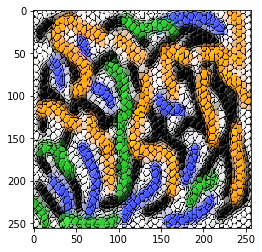

Style Image_2


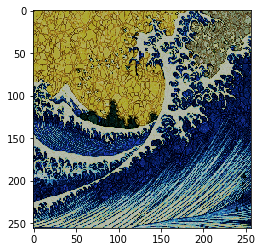

Content Image


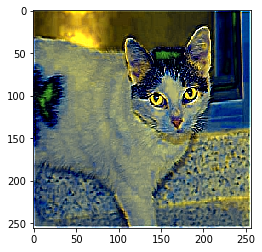

Styling...


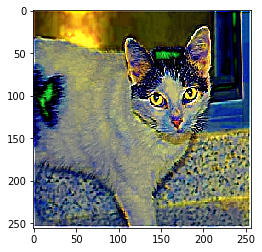

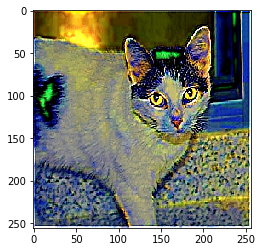

Saving output...


/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:64: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [9]:

print('Loading decoders...')
decoders = {}
decoders[1] = load_model('./decoder_1.h5')
decoders[2] = load_model('./decoder_1.h5')
decoders[3] = load_model('./decoder_3.h5')
decoders[4] = load_model('./decoder_3.h5')
decoders[5] = load_model('./decoder_3.h5')

print('Loading VGG...')
vgg = VGG19(input_shape=input_shape, target_layer=3)

import matplotlib.pyplot as plt

print('Style Image_1')
plt.imshow(np.clip(img_s_1[0] / 255, 0, 1))
plt.show()
print('Style Image_2')
plt.imshow(np.clip(img_s_2[0] / 255, 0, 1))
plt.show()
print('Content Image')
plt.imshow(np.clip(img_c[0] / 255, 0, 1))
plt.show()

print('Styling...')
for i in [1, 1]:
    feats_c = get_vgg_features(vgg, img_c, i)
    feats_s_1 = get_vgg_features(vgg, img_s_1, i)
    feats_s_2 = get_vgg_features(vgg, img_s_2, i)
    feats_cs = wct_m(feats_c, feats_s_1,feats_s_2,alpha=1.0,beta=0.5)
    img_c = decoders[i].predict(feats_cs)
    plt.imshow(np.clip(img_c[0] / 255, 0, 1))
    plt.show()
print('Saving output...')
beta=0.50
output_img = img_c[0]
OUTPUT_IMG_WCT_PATH = './cat_'+str(11315)+'_'+str(target_layer)+'_'+'Style2'+'_'+'Style1'+'_'+str(10*beta)+'_'+'WCT_Style.jpg'
imsave(OUTPUT_IMG_WCT_PATH , output_img)

Fig.9 shows the result of the 'wct_m' function where we can use multiple style images. The hyperparameter beta is set to 0.5. It means that both of the style input images has the same priority in the style transform. In comparison with Fig.8, the results are different and the style of the source style picutres can be seen in the reconstructed images.


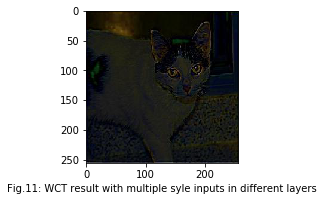

In [10]:
from matplotlib import pyplot
A = [3]

for i in range(len(A)):
    pyplot.subplot(120 + 1 + i)
    filename = './cat_'+str(11315)+'_'+str(A[i])+'_'+'Style2'+'_'+'Style1'+'_'+str(10*beta)+'_'+'WCT_Style.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
pyplot.xlabel('Fig.9: WCT result with multiple syle inputs in different layers')
# show the figure
pyplot.show()  


### REFERENCES:

1. https://www2.seas.gwu.edu/~ayoussef/papers/ImageDownUpSampling-CISST99.pdf
2. https://www.machinecurve.com/index.php/2020/01/30/what-are-max-pooling-average-pooling-global-max-pooling-and-global-average-pooling/
3. https://www.programcreek.com/python/example/89389/cv2.resize
4. https://arxiv.org/abs/1705.08086
5. https://www.tensorflow.org/tutorials/generative/style_transfer
6. https://github.com/eridgd/WCT-TF/blob/master/model.py
7. https://faroit.com/keras-docs/1.2.2/visualization/